In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import math
import statsmodels.api as sm 

c:\Users\veren\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def logreturns(P1, P2):
    R = math.log(P2/P1)
    return R

In [3]:
def returns(P1, P2):
    R = ((P2-P1)/P1)
    return R

In [4]:
# def logreturns_dividends(P1, P2, D):
#     R = math.log((P2+D)/P1)
#     return R

In [5]:
# def total_return_index(Ri1, P1, P2, D):
#     Ri2 = Ri1*((P2+D)/P1)
#     return Ri2

In [6]:
mon_logret = pd.read_csv('monthly_log_returns.csv')
data = pd.read_csv('P_VO_RI.csv')
Pdata = pd.read_csv('Pdata_dates.csv')

In [7]:
Pdata = Pdata.set_index('Date')
# Pdata

In [8]:
row_mean = Pdata.mean(axis=1)
# print(row_mean)

In [9]:
Pdata['mean'] = row_mean
# Pdata

In [10]:
dates = Pdata.index
# dates

In [11]:
def maret_cal(df, isin):
    maretdict = {}
    for i in range(len(df) - 1):
        P1 = df.iloc[i]
        P2 = df.iloc[i+1]
        maret = returns(P1, P2)
        maretdict[i] = maret
    return maretdict

In [12]:
maret = maret_cal(Pdata, 'mean')
# maret

In [13]:
maret_df = pd.DataFrame(maret)
# maret_df

In [14]:
dates_maret = dates.tolist()
dates_maret = dates_maret[1:]
# print((dates_maret))


In [15]:
maret_df.columns = dates_maret
# maret_df

In [16]:
mean_market_ret = maret_df[maret_df.index == 'mean']
# print(mean_market_ret)

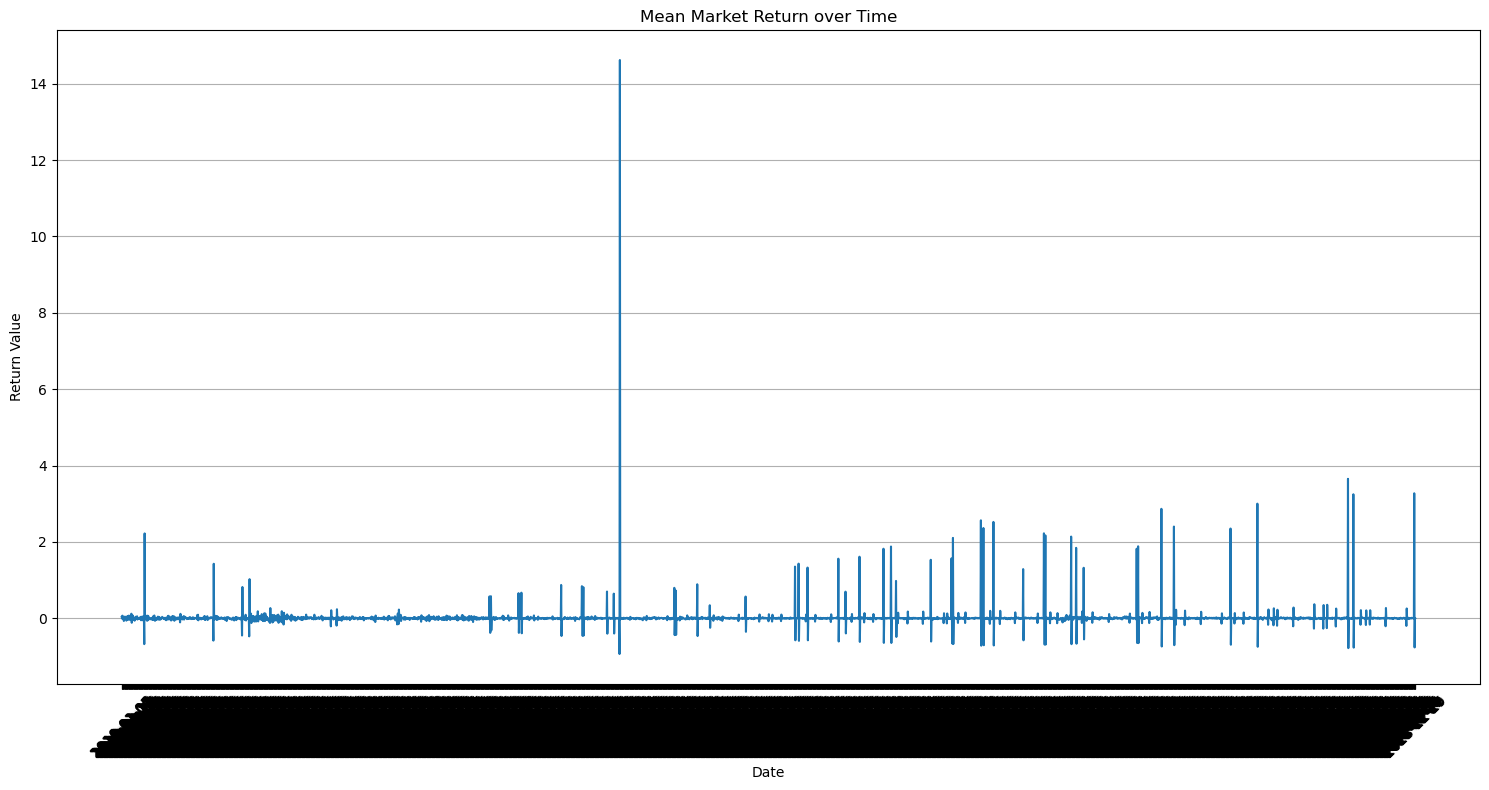

In [17]:
plt.figure(figsize=(15,8))

plt.plot(mean_market_ret.columns, mean_market_ret.values.reshape(-1), label='Date')

plt.title('Mean Market Return over Time')
plt.xlabel('Date')
plt.ylabel('Return Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [18]:
maret_df.describe()

c:\Users\veren\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\veren\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\veren\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\veren\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\veren\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\veren\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((

,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,2010-01-15,2010-01-18,...,2023-12-15,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29
count,182.000000,183.000000,183.000000,183.000000,182.000000,172.000000,172.000000,182.000000,182.000000,171.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,13.000000,13.000000,200.000000,201.000000
mean,0.017432,0.010626,0.005805,0.011711,0.005667,-0.000030,-0.009092,0.015111,0.001993,0.010323,...,0.002121,0.011332,-0.006375,0.012955,-0.003858,0.005961,0.262292,-0.058924,0.001830,0.001145
std,0.052261,0.045069,0.042571,0.053794,0.043041,0.053806,0.053622,0.078973,0.058536,0.098153,...,0.076922,0.069700,0.049544,0.078886,0.053055,0.050726,0.905167,0.213787,0.083288,0.101152
min,-0.166667,-0.116382,-0.142857,-0.100000,-0.142857,-0.250000,-0.333333,-0.234375,-0.250000,-0.325581,...,-0.500000,-0.166667,-0.333333,-0.500000,-0.500000,-0.368421,-0.021073,-0.763625,-0.250000,-0.500000
25%,-0.004529,-0.004005,-0.013866,-0.005529,-0.007042,-0.016737,-0.025844,-0.001715,-0.009997,-0.007946,...,0.000000,-0.009187,-0.008180,-0.000345,-0.009804,0.000000,-0.003273,-0.013699,-0.012644,-0.010409
50%,0.007391,0.003367,0.000000,0.000259,0.000000,0.000000,-0.002732,0.002212,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006118,-0.002797,0.000000,0.000000
75%,0.027647,0.020752,0.015417,0.019101,0.017970,0.014968,0.004787,0.022073,0.013259,0.014761,...,0.017094,0.011111,0.006207,0.017241,0.000782,0.008658,0.023588,-0.000511,0.006448,0.005618
max,0.285714,0.205047,0.185243,0.500000,0.185162,0.363636,0.254902,0.541667,0.500000,1.000000,...,0.583333,0.500000,0.125000,0.500000,0.333333,0.333333,3.273909,0.081081,1.000000,1.000000


In [19]:
maret_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, DE0005190003 to mean
Columns: 3613 entries, 2010-01-05 to 2023-12-29
dtypes: float64(3613)
memory usage: 6.0+ MB


In [20]:
maret_df.to_csv('return_daily.csv')

c:\Users\veren\anaconda3\Lib\site-packages\pandas\core\indexes\base.py:7834: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
